### Anomaly detection using autoencoders

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
df_stats_Ch3_test3 = pd.read_csv("estadisticos_test3_ch3.csv" , sep = ',')
X_Ch3 = df_stats_Ch3_test3[['Min', 'Max', 'Kurt', 'ImpFactor', 'RMS', 'MargFactor', 'Skewness',
               'ShapeFactor', 'PeakToPeak', 'CrestFactor']].values

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_Ch3)
X_Ch3 = scaler.transform(X_Ch3)

In [4]:
X_Ch3_primerCuarto = X_Ch3[:int(len(X_Ch3)/4)]

In [5]:
encoder = keras.Sequential(name='encoder')
encoder.add(layers.Dense(units=10, activation = 'relu'))
encoder.add(layers.Dense(units=10, activation = 'relu'))
encoder.add(layers.Dense(units=5, activation = 'relu'))

decoder = keras.Sequential(name='decoder')
decoder.add(layers.Dense(units=5, activation = 'relu'))
decoder.add(layers.Dense(units=10, activation = 'relu'))
decoder.add(layers.Dense(units=10, activation = 'tanh'))

autoencoder = keras.Sequential([encoder, decoder])

In [6]:
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")

In [7]:
history = autoencoder.fit(
    X_Ch3_primerCuarto,
    X_Ch3_primerCuarto,
    epochs=1000,
    batch_size=128,
    validation_split=0.1,
    #callbacks=[
     #   keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, mode="min")
    #],
)

Epoch 1/1000
12/12 [==============================] - 0s 16ms/step - loss: 0.4082 - val_loss: 0.3383
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3884 - val_loss: 0.3247
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3775 - val_loss: 0.3180
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3701 - val_loss: 0.3111
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3598 - val_loss: 0.3016
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.3478 - val_loss: 0.2905
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.3325 - val_loss: 0.2764
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.3151 - val_loss: 0.2608
Epoch 9/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2958 - val_loss: 0.2446
Epoch 10/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.2762 - val_loss: 0.229

In [8]:
x_train = X_Ch3_primerCuarto
x_train_pred = autoencoder.predict(x_train)
x_train_pred

array([[-0.05030989,  0.3662549 ,  0.87994313, ...,  0.9986347 ,
         0.1980842 ,  0.9528807 ],
       [ 0.11929986, -0.20176275,  0.3959927 , ...,  0.8629022 ,
        -0.1027694 , -0.46921915],
       [ 0.27017424, -0.3040221 ,  0.07546005, ...,  0.41418114,
        -0.2889925 , -0.96259   ],
       ...,
       [ 0.16931695, -0.21557839, -0.09939255, ..., -0.17885824,
        -0.17207032, -0.26287434],
       [ 0.25788018, -0.36914933, -0.24869396, ..., -0.46790835,
        -0.30028543, -0.9041262 ],
       [ 0.11358401, -0.12622422,  0.07178787, ...,  0.27242377,
        -0.12675975,  0.04110802]], dtype=float32)

In [9]:
x_test = X_Ch3
x_test_pred = autoencoder.predict(x_test)

In [10]:
error_test = np.abs(x_test - x_test_pred)
error_test
params = ['Min', 'Max', 'Kurt', 'ImpFactor', 'RMS', 'MargFactor', 'Skewness',
               'ShapeFactor', 'PeakToPeak', 'CrestFactor']
error_min = error_test[:, 0]
error_max = error_test[:, 1]
error_kurt = error_test[:, 2]
error_if = error_test[:, 3]
error_rms = error_test[:, 4]
error_mf = error_test[:, 5]
error_skew = error_test[:, 6]
error_sf = error_test[:, 7]
error_ptp = error_test[:, 8]
error_cf = error_test[:, 9]

(-1.0, 12.0)

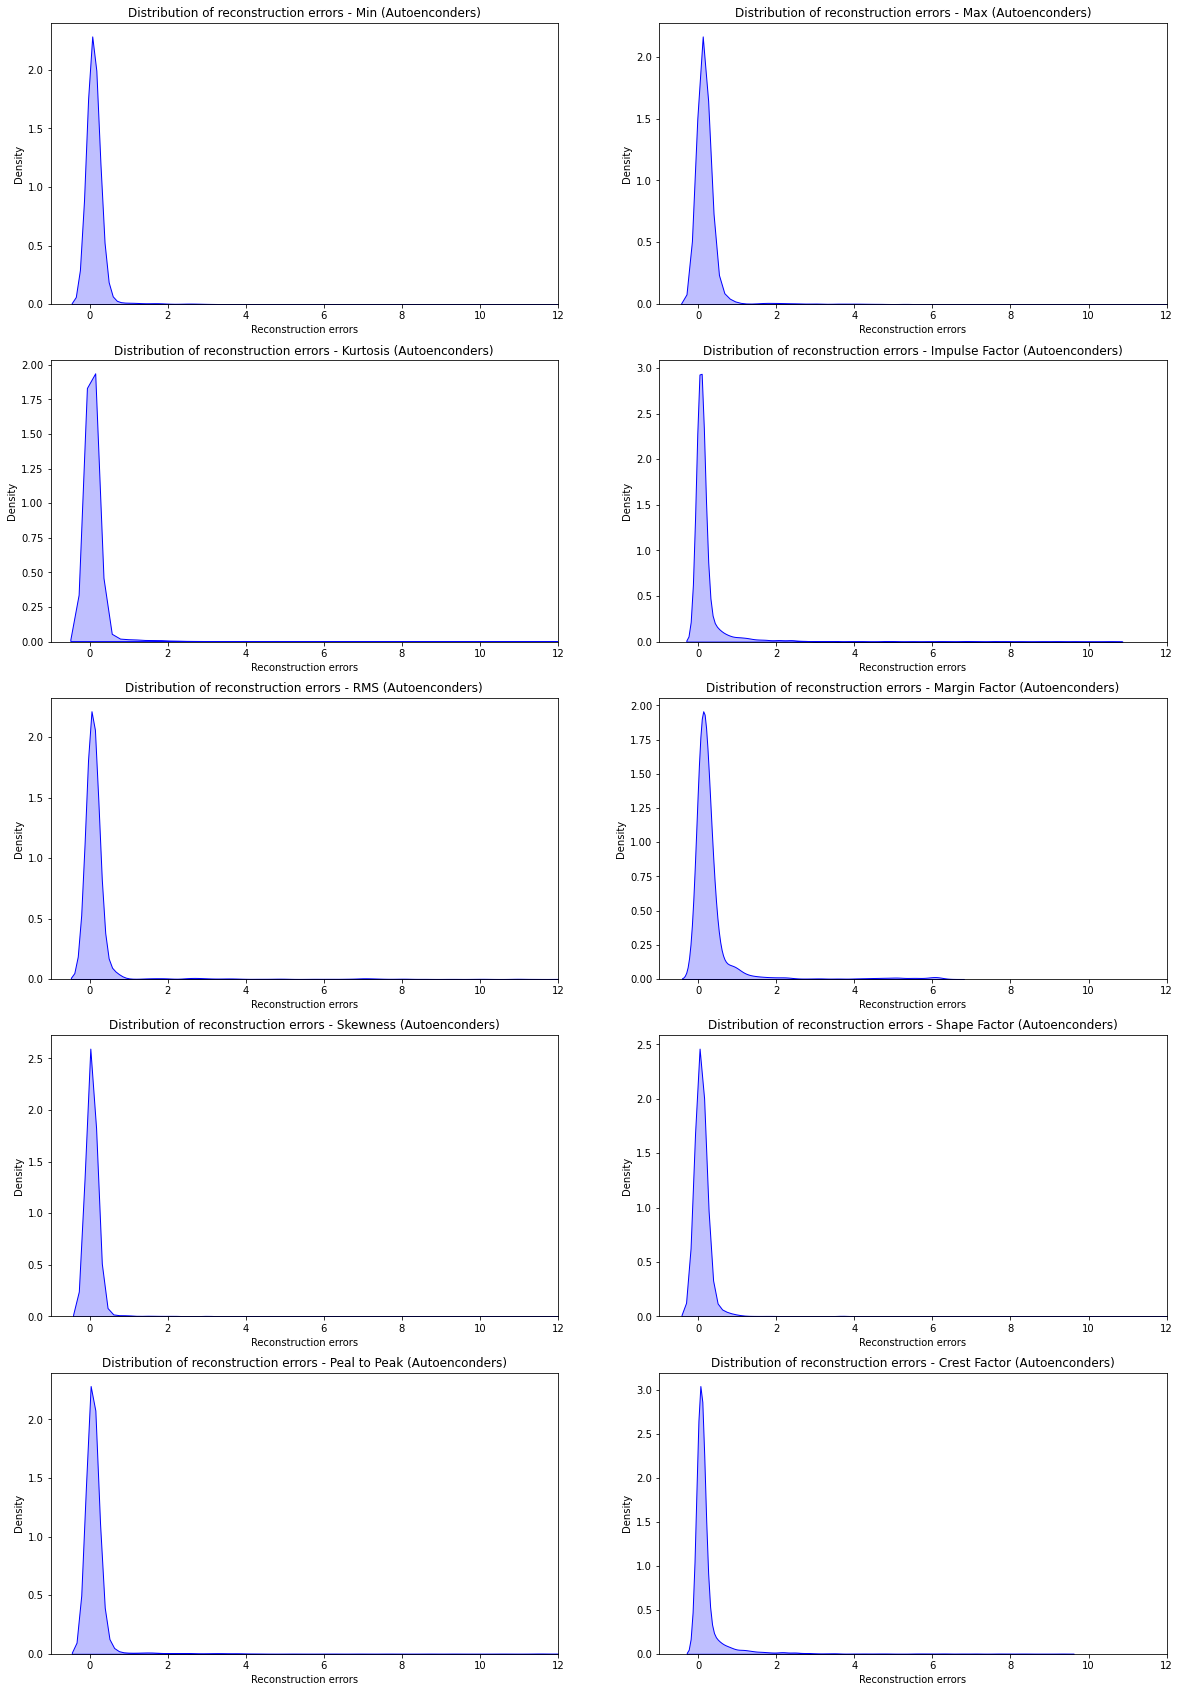

In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
sns.distplot(
    error_min,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax1
)
ax1.set_title('Distribution of reconstruction errors - Min (Autoenconders)')
ax1.set_xlabel('Reconstruction errors');

sns.distplot(
    error_max,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax2
)
ax2.set_title('Distribution of reconstruction errors - Max (Autoenconders)')
ax2.set_xlabel('Reconstruction errors');

sns.distplot(
    error_kurt,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax3
)
ax3.set_title('Distribution of reconstruction errors - Kurtosis (Autoenconders)')
ax3.set_xlabel('Reconstruction errors');

sns.distplot(
    error_if,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax4
)
ax4.set_title('Distribution of reconstruction errors - Impulse Factor (Autoenconders)')
ax4.set_xlabel('Reconstruction errors');

sns.distplot(
    error_rms,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax5
)
ax5.set_title('Distribution of reconstruction errors - RMS (Autoenconders)')
ax5.set_xlabel('Reconstruction errors');

sns.distplot(
    error_mf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax6
)
ax6.set_title('Distribution of reconstruction errors - Margin Factor (Autoenconders)')
ax6.set_xlabel('Reconstruction errors');

sns.distplot(
    error_skew,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax7
)
ax7.set_title('Distribution of reconstruction errors - Skewness (Autoenconders)')
ax7.set_xlabel('Reconstruction errors');

sns.distplot(
    error_sf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax8
)
ax8.set_title('Distribution of reconstruction errors - Shape Factor (Autoenconders)')
ax8.set_xlabel('Reconstruction errors');

sns.distplot(
    error_ptp,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax9
)
ax9.set_title('Distribution of reconstruction errors - Peal to Peak (Autoenconders)')
ax9.set_xlabel('Reconstruction errors');

sns.distplot(
    error_cf,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax10
)
ax10.set_title('Distribution of reconstruction errors - Crest Factor (Autoenconders)')
ax10.set_xlabel('Reconstruction errors');

ax1.set_xlim([-1, 12])
ax2.set_xlim([-1, 12])
ax3.set_xlim([-1, 12])
ax4.set_xlim([-1, 12])
ax5.set_xlim([-1, 12])
ax6.set_xlim([-1, 12])
ax7.set_xlim([-1, 12])
ax8.set_xlim([-1, 12])
ax9.set_xlim([-1, 12])
ax10.set_xlim([-1, 12])

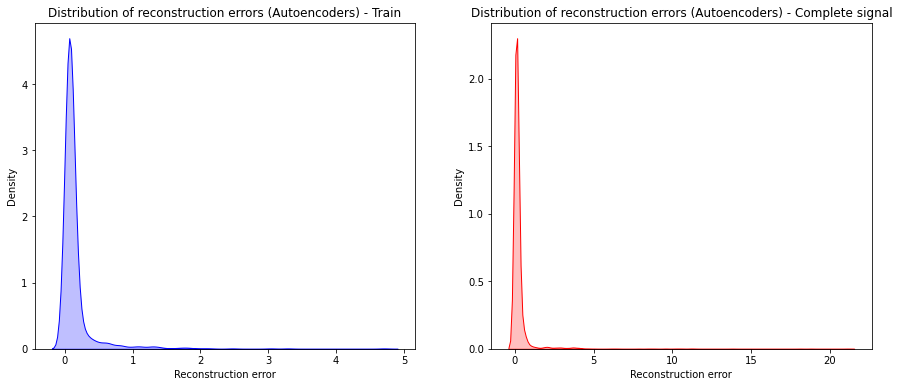

In [12]:
X_primerCuarto = X_Ch3[:int(len(X_Ch3)/4)]
# Reconstrucciopnes
reconstruccion_train = autoencoder.predict(X_primerCuarto)
reconstruccion = autoencoder.predict(X_Ch3)
    
# RMSE: 
error_reconstruccion_train = np.sqrt(((reconstruccion_train - X_primerCuarto) ** 2).mean(axis=1))
error_reconstruccion = np.sqrt(((reconstruccion - X_Ch3) ** 2).mean(axis=1))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(
    error_reconstruccion_train,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax1
)
ax1.set_title('Distribution of reconstruction errors (Autoencoders) - Train')
ax1.set_xlabel('Reconstruction error');

sns.distplot(
    error_reconstruccion,
    hist    = False,
    rug     = False,
    color   = 'red',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax2
)
ax2.set_title('Distribution of reconstruction errors (Autoencoders) - Complete signal')
ax2.set_xlabel('Reconstruction error');

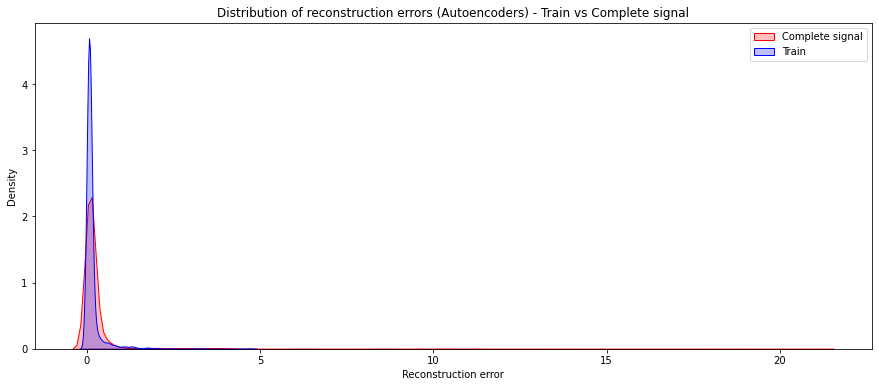

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

sns.distplot(
    error_reconstruccion,
    hist    = False,
    rug     = False,
    color   = 'red',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax,
    label = 'Complete signal'
)
sns.distplot(
    error_reconstruccion_train,
    hist    = False,
    rug     = False,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax,
    label = 'Train'
)
ax.set_title('Distribution of reconstruction errors (Autoencoders) - Train vs Complete signal')
ax.set_xlabel('Reconstruction error');
ax.legend()

In [14]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=33).fit(error_reconstruccion[int(len(error_reconstruccion)/4):].reshape(-1, 1))
gm.means_

array([[0.1084624 ],
       [1.45295987]])

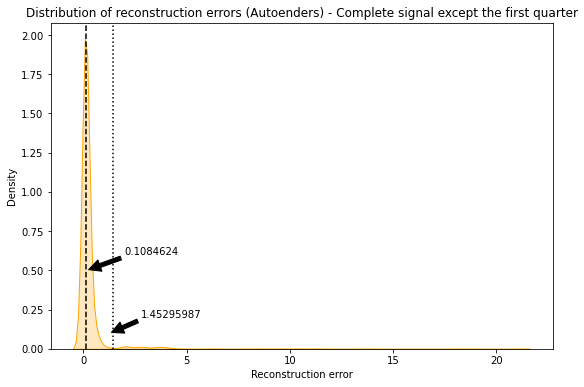

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
sns.distplot(
    error_reconstruccion[int(len(error_reconstruccion)/4):],
    hist    = False,
    rug     = False,
    color   = 'orange',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)
ax.axvline(gm.means_[0], ls = '--', color = 'black')
ax.annotate(str(round(gm.means_[0][0],8)), xy=(0.16, 0.5), xytext=(2, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.axvline(gm.means_[1], ls = ':', color = 'black')
ax.annotate(str(round(gm.means_[1][0],8)), xy=(1.28, 0.1), xytext=(2.8, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_title('Distribution of reconstruction errors (Autoenders) - Complete signal except the first quarter')
ax.set_xlabel('Reconstruction error');

In [16]:
pred_GM = [0] * int(len(error_reconstruccion)/4)
pred_GM_3cuartos = gm.predict(error_reconstruccion[int(len(error_reconstruccion)/4):].reshape(-1, 1))
for i in range(len(pred_GM_3cuartos)):
    pred_GM.append(pred_GM_3cuartos[i])
pred_GM = np.array(pred_GM)

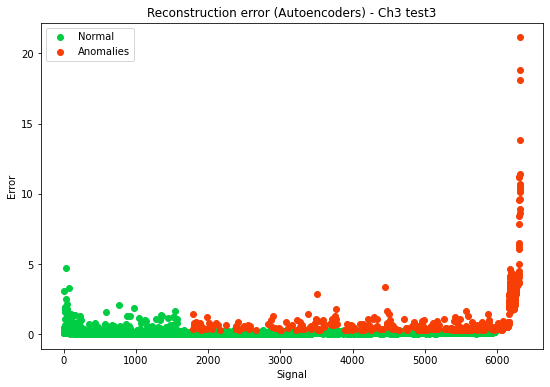

In [17]:
colores = ["#00cc44", "#f73e05"]
n_signal = list(range(len(pred_GM)))
n_signal = np.array(n_signal)
signals_0 = n_signal[pred_GM == 0]
error_rec_0 = error_reconstruccion[pred_GM == 0]
signals_1 = n_signal[pred_GM == 1]
error_rec_1 = error_reconstruccion[pred_GM == 1]
plt.figure(figsize=(9,6))
plt.scatter(signals_0, error_rec_0, c = "#00cc44", label = 'Normal')
plt.scatter(signals_1, error_rec_1, c = "#f73e05", label = 'Anomalies')
plt.title('Reconstruction error (Autoencoders) - Ch3 test3')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend()

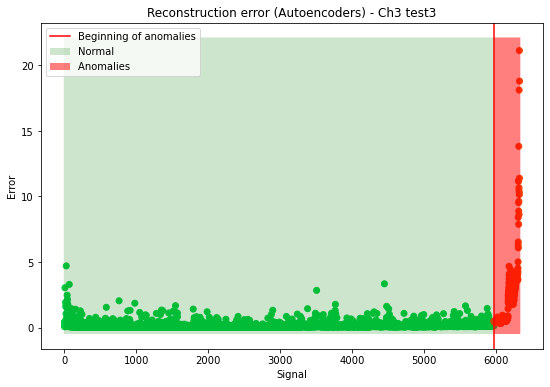

In [18]:
comienzo_1hora_anomalias = 'NA'
for i in range(len(pred_GM)):
    if pred_GM[i:i+6].all():
        comienzo_1hora_anomalias = i
        break
        
pred_GM_1hora_anomalias = [0] * comienzo_1hora_anomalias + [1] * (len(pred_GM) - comienzo_1hora_anomalias)
colores = ["#00cc44", "#f73e05"]
x = np.arange(-10, len(df_stats_Ch3_test3)+10, 0.02)
n_signal = list(range(len(pred_GM_1hora_anomalias)))
plt.figure(figsize=(9,6))
plt.scatter(n_signal, error_reconstruccion, c = np.take(colores, pred_GM_1hora_anomalias))
plt.axvline(comienzo_1hora_anomalias, color = 'r', label = 'Beginning of anomalies')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where = x < comienzo_1hora_anomalias, 
                         facecolor = 'green', alpha = 0.2, label = 'Normal')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where =  x > comienzo_1hora_anomalias, 
                         facecolor = 'red', alpha = 0.5, label = 'Anomalies ')
plt.title('Reconstruction error (Autoencoders) - Ch3 test3')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend(loc = 2)

### Z-Scores

In [19]:
mean = np.mean(error_reconstruccion_train)
std = np.std(error_reconstruccion_train)
zscore = (error_reconstruccion - mean) / std

In [20]:
threshold = 3
outlier = [0] * len(error_reconstruccion_train)
for i in range(len(error_reconstruccion_train), len(error_reconstruccion)):
    z = (error_reconstruccion[i] - mean) / std
    if abs(z) > threshold:
        outlier.append(1)
    else:
        outlier.append(0)
outlier = np.array(outlier)

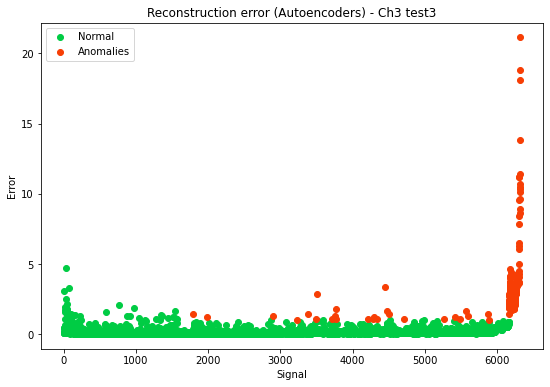

In [21]:
n_signal = list(range(len(error_reconstruccion)))
n_signal = np.array(n_signal)
signals_0 = n_signal[outlier == 0]
error_rec_0 = error_reconstruccion[outlier == 0]
signals_1 = n_signal[outlier == 1]
error_rec_1 = error_reconstruccion[outlier == 1]
plt.figure(figsize=(9,6))
plt.scatter(signals_0, error_rec_0, c = "#00cc44", label = 'Normal')
plt.scatter(signals_1, error_rec_1, c = "#f73e05", label = 'Anomalies')
plt.title('Reconstruction error (Autoencoders) - Ch3 test3')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend()

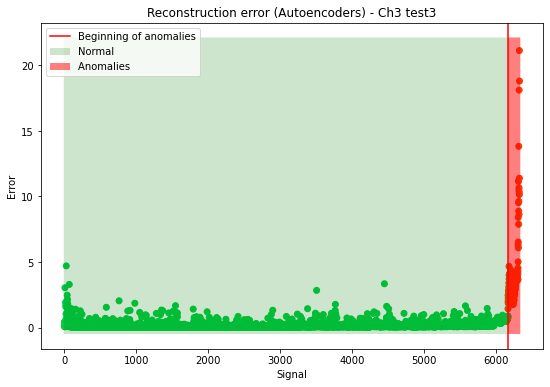

In [22]:
z = (error_reconstruccion - mean) / std
comienzo_1hora_ouliers = 'NA'
for i in range(len(error_reconstruccion_train), len(error_reconstruccion)):
    if (abs(z[i:i+6]) > threshold).all():
        comienzo_1hora_ouliers = i
        break

colores = ["#00cc44", "#f73e05"]
zscores_1hora_anomalias = [0] * comienzo_1hora_ouliers + [1] * (len(z) - comienzo_1hora_ouliers)
x = np.arange(-10, len(df_stats_Ch3_test3) + 10, 0.02)
n_signal = list(range(len(zscores_1hora_anomalias)))
plt.figure(figsize=(9,6))
plt.scatter(n_signal, error_reconstruccion, c = np.take(colores, zscores_1hora_anomalias))
plt.axvline(comienzo_1hora_ouliers, color = 'r', label = 'Beginning of anomalies')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where = x < comienzo_1hora_ouliers, 
                         facecolor = 'green', alpha = 0.2, label = 'Normal')
plt.fill_between(x, min(error_reconstruccion)-0.5, max(error_reconstruccion)+1, where =  x > comienzo_1hora_ouliers, 
                         facecolor = 'red', alpha = 0.5, label = 'Anomalies ')
plt.title('Reconstruction error (Autoencoders) - Ch3 test3')
plt.xlabel('Signal')
plt.ylabel('Error')
plt.legend(loc = 2)